In [39]:
# Import built-in libraries
import os
import sys
import time
import logging

# Import data handling libraries
import numpy as np
import pandas as pd

from IPython.display import Image
from typing import List, Tuple

# Arrays and Strings 
## Arrays
* Arrays (1D) and strings are very similiar (ordered group of elements)
* Algorithm questions will normally include an array or string as an input
* Normally use dynamic lists for algorithms
## StringsMutable
* strings can be mutable or immutable (a type of data that can be changed)
* C++ strings are mutable, Python they aren't

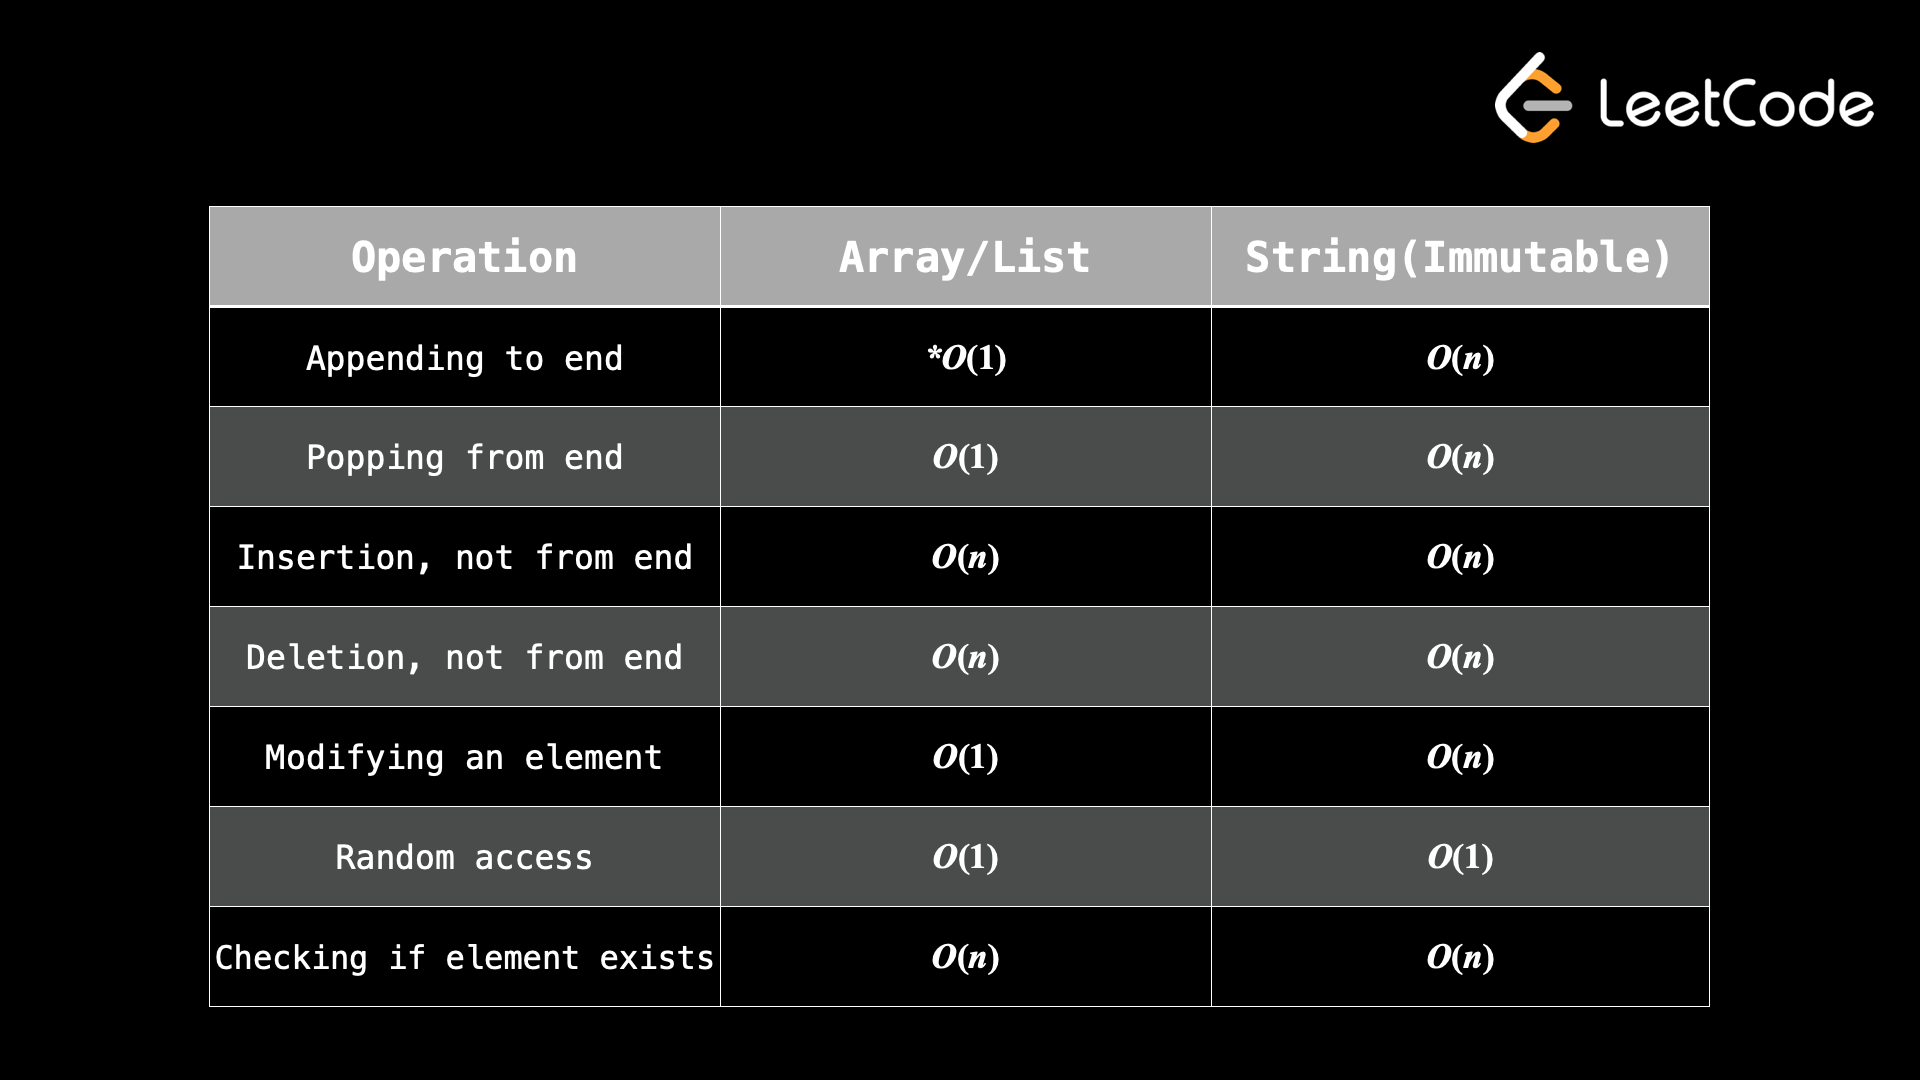

In [40]:
# Replace 'your_image.jpg' with the name of your image file
display(Image(filename='TimeComplexityStrings.png'))

# Two Pointers

* Common technique where you iterate from the edges towards the centre
* Ensures that the complexity is never greater than O(n)
* Example of some basic pseudocode below

### Palindrome
* Refer to Palindrome.cpp for example
* Can see that it has complexity O(n) - because the while loop iterations cost 
O(1) each, and there can never be more than O(n) iterations of the while loop - the pointers start at a distance of n from each other and move closer by one step each iteration.

### Palindrome

In [41]:
# implement Palindrome Example (to do)


## Sorted Array - Target integer

Given a sorted array of unique integers and a target integer, return true if there exists a pair of numbers that sum to target, false otherwise. This problem is similar to Two Sum. (In Two Sum, the input is not sorted).

For example, given nums = [1, 2, 4, 6, 8, 9, 14, 15] and target = 13, return true because 4 + 9 = 13.

See SortedArrayTargetInt.cpp

In [42]:
# Sorted Array and Target Integer example (to do)

## Sliding Windows
* sub-array: a contiguous section of the array
* it can be defined by two indices representing the start and end (left and right bound)
* When should I use sliding window?
    * the problem explicitly or implictly defines criteria that makes a subarray "valid" (a constraint metric and numeric restriction on constraint metric)
    * the problem will ask you to find valid aubarray in some way
* Whenever a problem description talks about subarrays, you should figure out if sliding window is a good option by analyzing the problem description.

### Sliding Windows - Implementation
Case: find the longest subarray with a sum less than or equal to k
* constraint metric: sum of the window
* can keep track by keeping the array in a separate window and adding / subtracting elements from the array and then just sum all the elements
* However, this is quite inefficient because it requires O(n) operations every time we do a sum
* Instead we can just store the sum in a variable and add / subtract the new ele ment, which is now O(1) every time we recalculate the sum
* Only increment the left when the curr sum exceeds k, or the target value (can use a while loop)
* update each answer in each for loop operation and check that right - left + 1 is more than the current longest length
* see below for some pseudocode


function fn(nums, k):
    left = 0
    curr = 0
    answer = 0
    for (int right = 0; right < nums.length; right++):
        // Do some logic to "add" element at arr[right] to window
        curr += nums[right]
        while (curr > k):
            // Do some logic to "remove" element at arr[left] from window
            curr -= nums[left]
            left++

        answer = max(answer, right - left + 1)

    return answer

### Sliding Windows - Why is it efficient?
* If we were to evaluate every subarray, the algorithm would be complexity O(n^2)
* instead, sliding method limits the number of iterations to 2n - the pointer can move n times to the right and n times from the left. Therefore the complexity is limited to O(n)

#### Sliding Windows - Example 1 (see above)

In [43]:
def find_length_ex1(nums, k):
    # curr is the current sum of the window
    left = curr = ans = 0
    for right in range(len(nums)):
        curr += nums[right]
        while curr > k:
            curr -= nums[left]
            left += 1
        ans = max(ans, right - left + 1)
    
    return ans



#### Sliding Windows - Example 2
You are given a binary string s (a string containing only "0" and "1"). You may choose up to one "0" and flip it to a "1". What is the length of the longest substring achievable that contains only "1"?

For example, given s = "1101100111", the answer is 5. If you perform the flip at index 2, the string becomes 1111100111.

* Essentially what is the longest string with just a single 0 in it?
* Constraint condition is window.count("0") <= 1
* Use integer curr to count how many zeroes are current in the window
* This example also runs in O(n) time

In [44]:
def find_length_ex2(s):
    # curr is the current number of zeros in the window
    left = curr = ans = 0 
    for right in range(len(s)):
        if s[right] == "0":
            curr += 1
        while curr > 1:
            if s[left] == "0":
                curr -= 1
            left += 1
        ans = max(ans, right - left + 1)
    
    return ans

### Sliding Windows - Number of Subarrays (neat trick)
* Essentially check how many subarrays end at the current index to count the number of valid subarrays

### Sliding Window - Fixed Window Size
* These problems are easy because the difference between any two adjacent windows is only two elements (we add one element on the right and remove one element on the left to maintain the length).
* When we add an element to the array, just need to remove a corresponding element at i - k

#### Sliding Windows - Number Subarrays -  Product Less Thank K

#### Example 4 - Fixed Window Size
* Given an integer array nums and an integer k, find the sum of the subarray with the largest sum whose length is k.

In [45]:
class Solution:
    # Example 3
    def numSubarrayProductLessThanK(self, nums: List[int], k: int) -> int:
        if k <= 1:
            return 0

        ans = left = 0
        curr = 1

        for right in range(len(nums)):
            curr *= nums[right]
            while curr >= k:
                curr //= nums[left]
                left += 1
                
            ans += right - left + 1

        return ans
    
    # Example 4
    def find_best_subarray(self, nums: List[int], k: int):
        curr = 0
        for i in range(k):
            curr += nums[i]
        
        ans = curr
        for i in range(k, len(nums)):
            curr += nums[i] - nums[i - k]
            ans = max(ans, curr)
        
        return ans

### Prefix Sum
* Make an array that is the sum of all elements up to i
* Allows us to find the sum of any subarray using the following formula: prefix[right] - prefix[left - 1]
* Great tool when problem involves sums of subarrays, only costs O(n) to build and every future query will be O(1). If we ddidn't use this method the computational power would be O(n*m)
* Form ofpre-processing, where we store pre-computed data before running the main logic

#### Building a Prefix Sum
Given an array nums,

prefix = [nums[0]]
for (int i = 1; i < nums.length; i++)
    prefix.append(nums[i] + prefix[prefix.length - 1])

#### Prefix Array - Do we need an array?
* Theoretically no, can compute the left section and then the right section is the total sum - left section
* Reduces the complexity down to O(1)

#### Prefix Sum - Example 1
Example 1: Given an integer array nums, an array queries where queries[i] = [x, y] and an integer limit, return a boolean array that represents the answer to each query. A query is true if the sum of the subarray from x to y is less than limit, or false otherwise.

For example, given nums = [1, 6, 3, 2, 7, 2], queries = [[0, 3], [2, 5], [2, 4]], and limit = 13, the answer is [true, false, true]. For each query, the subarray sums are [12, 14, 12].

See Answer Below

#### Prefix Sum - Example 2
Given an integer array nums, find the number of ways to split the array into two parts so that the first section has a sum greater than or equal to the sum of the second section. The second section should have at least one number.

In [53]:
class PS_Solution:
    def answer_queries(self, nums: List[int], queries: List[Tuple[int,int]], limit: int):
        prefix = [nums[0]]
        for i in range(1, len(nums)):
            prefix.append(nums[i] + prefix[-1])
        
        ans = []
        for x, y in queries:
            curr = prefix[y] - prefix[x] + nums[x]
            ans.append(curr < limit)

        return ans
    
    def waysToSplitArray(self, nums: List[int]) -> int:
        n = len(nums)
        
        prefix = [nums[0]]
        for i in range(1, n):
            prefix.append(nums[i] + prefix[-1])

        ans = 0
        for i in range(n - 1):
            left_section = prefix[i]
            right_section = prefix[-1] - prefix[i]
            if left_section >= right_section:
                ans += 1

        return ans
    
    def waysToSplitArrayV2(self, nums: List[int]) -> int:
        ans = left_section = 0
        total = sum(nums)

        for i in range(len(nums) - 1):
            left_section += nums[i]
            right_section = total - left_section
            if left_section >= right_section:
                ans += 1

        return ans


### More Common Patterns
#### O(n) String Building
* 

In [54]:
def main():
    # Sliding Window Examples
    Ex1_Answer = find_length_ex1([1,2,3,4,5], 6)
    Ex2_Answer = find_length_ex2("11110110110111")
    solution = Solution()
    Ex3_Answer = solution.numSubarrayProductLessThanK([10,5,6,2],100)
    Ex4_Answer = solution.find_best_subarray([3,-1,4,12,-8,5,6],4)

    # Prefix Sum Examples
    ps_solution = PS_Solution()
    PS1_Answer = ps_solution.answer_queries([1, 6, 3, 2, 7, 2],[[0, 3], [2, 5], [2, 4]],13)
    PS2_Answer = ps_solution.waysToSplitArray([10,14,6,13])
    PS3_Answer = ps_solution.waysToSplitArrayV2([10,14,6,13])

    print("Sliding Window Example Solutions:")
    print("SW Example 1 Answer:", Ex1_Answer)
    print("SW Example 2 Answer: ", Ex2_Answer)
    print("SW Example 3 Answer: Number Subarrays -  Product Less Thank K: ", Ex3_Answer)
    print("SW Example 4 Answer: Largest sum across subarray of length 4 is: ", Ex4_Answer, "\n")

    print("Prefix Sum Example Solutions:")
    print("PS Example 1: the following queries were less (true) or more (false) than the limit: ", PS1_Answer)
    print("PS Example 2 O(n) Solution: The number of ways to split the array so the left sum < right sum is: ", PS2_Answer)
    print("PS Example 2 O(1) Solution: The number of ways to split the array so the left sum < right sum is: ", PS3_Answer)


if __name__ == "__main__":
    main()
    

Sliding Window Example Solutions:
SW Example 1 Answer: 3
SW Example 2 Answer:  7
SW Example 3 Answer: Number Subarrays -  Product Less Thank K:  8
SW Example 4 Answer: Largest sum across subarray of length 4 is:  18 

Prefix Sum Example Solutions:
PS Example 1: the following queries were less (true) or more (false) than the limit:  [True, False, True]
PS Example 2 O(n) Solution: The number of ways to split the array so the left sum < right sum is:  2
PS Example 2 O(1) Solution: The number of ways to split the array so the left sum < right sum is:  2
